In [1]:
from keras.models import load_model
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
from utils import *
%matplotlib inline

Using TensorFlow backend.
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python

In [2]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        list_files = os.listdir(os.path.join(path, i))
        if len(list_files) > 10:
            for f in list_files:
                # Check file extension. Allow only jpg/jpeg' files.
                ext = os.path.splitext(f)[1]
                if ext == '.jpg' or ext == '.jpeg':
                    metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [3]:
#memuat model pakek kodingan train-alexnet-new
model = load_model('model-alexnet-14july/_AlexNet_.23-0.63.hdf5',compile=False)
metadata = load_metadata('food-50/test/')
print(f'Test data: {len(metadata)}')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Test data: 12500


In [4]:
def recognize(img):
    prediction = model.predict(np.expand_dims(img, axis=0))[0]

    return prediction

In [5]:
import pyprind


labels = pickle.load(open('label/label_50kelas','rb'))
y_pred = []

bar = pyprind.ProgBar(len(metadata),monitor=True, title='Proses Pengujian')
for data in metadata:
    path = data.image_path()
    img = load_img(path, target_size=(227, 227))
    img = img_to_array(img)
    pred = recognize(img)
    label = labels[np.argmax(pred)]
    y_pred.append(label)
    bar.update()
print(bar)

Proses Pengujian
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:07:30


Title: Proses Pengujian
  Started: 07/16/2020 23:13:38
  Finished: 07/16/2020 23:21:09
  Total time elapsed: 00:07:30
  CPU %: 908.60
  Memory %: 1.59


In [6]:
y_true = [data.name for data in metadata]

true_count = 0
for true, pred in zip(y_true, y_pred):
    if true == pred:
        true_count += 1
        
acc = (true_count/len(y_true)) * 100
print(f'Overall Accuracy: {acc}%')

Overall Accuracy: 62.512%


In [7]:
#library cnf_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
%%time
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Wall time: 0 ns


In [9]:
print(classification_report(y_true, y_pred, labels=labels))

                       precision    recall  f1-score   support

              baklava       0.57      0.56      0.56       250
             beignets       0.72      0.70      0.71       250
             bibimbap       0.72      0.74      0.73       250
         caesar_salad       0.59      0.72      0.65       250
              cannoli       0.50      0.49      0.49       250
        chicken_wings       0.58      0.71      0.64       250
       chocolate_cake       0.58      0.64      0.61       250
              churros       0.49      0.53      0.51       250
         clam_chowder       0.71      0.76      0.73       250
        club_sandwich       0.49      0.48      0.48       250
         creme_brulee       0.74      0.74      0.74       250
            cup_cakes       0.49      0.43      0.46       250
         deviled_eggs       0.70      0.72      0.71       250
               donuts       0.40      0.29      0.34       250
            dumplings       0.73      0.74      0.74  

Confusion Matrix, Tanpa Normalisasi
[[139   2   1 ...   1   4   5]
 [  6 175   0 ...   2   1   1]
 [  0   0 184 ...   5   3   0]
 ...
 [  5   1   4 ... 121   4   1]
 [  4   1   5 ...   4 134   6]
 [  1   2   0 ...   1   3  95]]


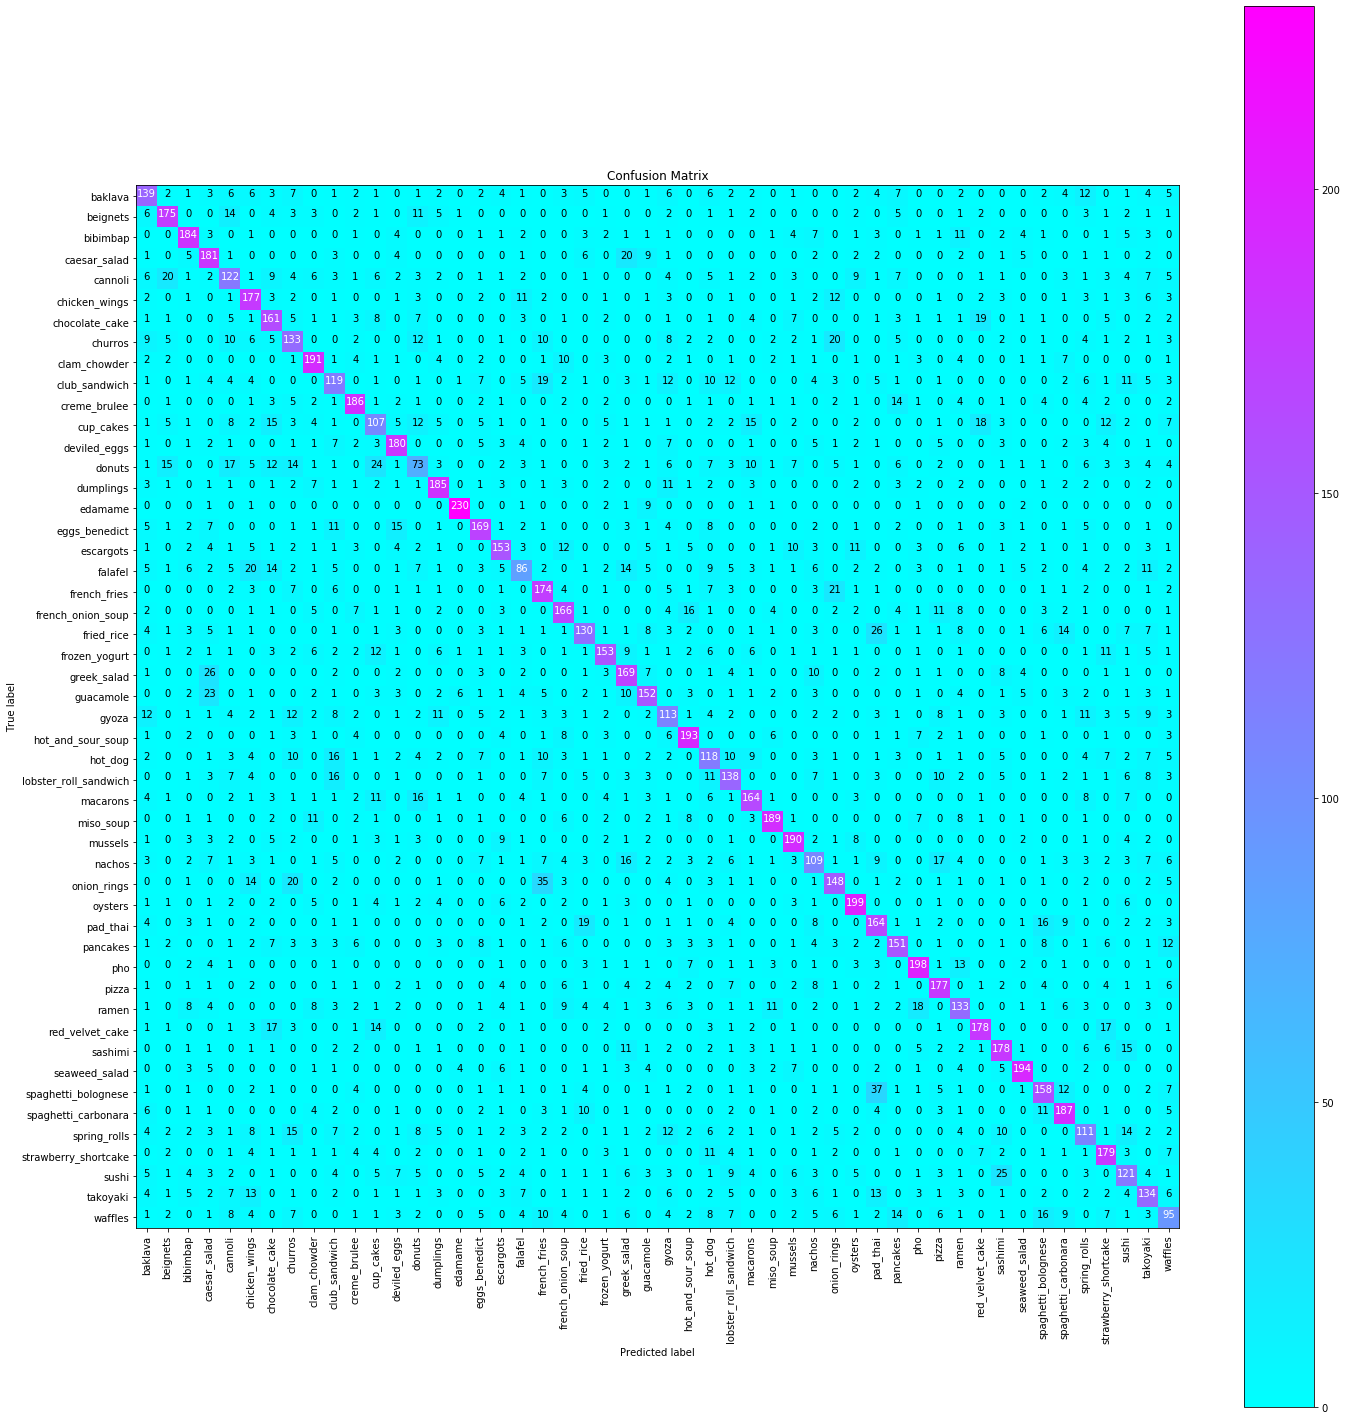

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    fungsi ini akan buat plot confusion matrix. 
    jk normalisasi, set `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix, Normalisasi")
    else:
        print('Confusion Matrix, Tanpa Normalisasi')

    print(cm)

    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# hitungan
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

class_names = labels

plt.figure()
fig = plt.gcf()
fig.set_size_inches(20, 20)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix',
                      cmap=plt.cm.cool)
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[139,   2,   1, ...,   1,   4,   5],
       [  6, 175,   0, ...,   2,   1,   1],
       [  0,   0, 184, ...,   5,   3,   0],
       ...,
       [  5,   1,   4, ..., 121,   4,   1],
       [  4,   1,   5, ...,   4, 134,   6],
       [  1,   2,   0, ...,   1,   3,  95]], dtype=int64)

In [12]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# sensitivitas atau true positive rate
TPR = TP/(TP+FN)
# spesifisitas atau true negative rate
TNR = TN/(FP+TN) 
# presisi 
PPV = TP/(TP+FP)
# nilai presisi negatif
NPV = TN/(TN+FN)
# false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# akurasi keseluruhan
ACC = (TP+TN)/(TP+FP+FN+TN)
# akurasi tiap kelas rumus lain
accu = (TP+TN)/101927
#error
ERROR = (FP+FN)/(TP+FP+FN+TN)

In [13]:
# sensitivitas atau true positive rate
print(TPR)

[0.56 0.7  0.74 0.72 0.49 0.71 0.64 0.53 0.76 0.48 0.74 0.43 0.72 0.29
 0.74 0.92 0.68 0.61 0.34 0.7  0.66 0.52 0.61 0.68 0.61 0.45 0.77 0.47
 0.55 0.66 0.76 0.76 0.44 0.59 0.8  0.66 0.6  0.79 0.71 0.53 0.71 0.71
 0.78 0.63 0.75 0.44 0.72 0.48 0.54 0.38]


In [14]:
# spesifisitas atau true negative rate
print(TNR)

[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 1.   0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 1.   0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 1.   0.99
 1.   0.99 0.99 0.99 0.99 0.99 0.99 0.99]


In [15]:
# presisi 
print(PPV)

[0.57 0.72 0.72 0.59 0.5  0.58 0.58 0.49 0.71 0.49 0.74 0.49 0.7  0.4
 0.73 0.94 0.66 0.67 0.51 0.58 0.63 0.63 0.71 0.57 0.64 0.44 0.74 0.47
 0.57 0.66 0.81 0.73 0.49 0.62 0.74 0.55 0.64 0.76 0.66 0.56 0.77 0.66
 0.83 0.64 0.68 0.5  0.63 0.51 0.52 0.44]


In [16]:
# nilai presisi negatif
print(NPV)

[0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 1.   0.99 0.99 0.99 0.99 0.99
 0.99 1.   0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 1.   0.99
 0.99 0.99 1.   1.   0.99 0.99 1.   0.99 0.99 1.   0.99 0.99 0.99 0.99
 1.   0.99 0.99 0.99 0.99 0.99 0.99 0.99]


In [17]:
# false positive rate
print(FPR)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.01
 0.   0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [18]:
# False negative rate
print(FNR)

[0.44 0.3  0.26 0.28 0.51 0.29 0.36 0.47 0.24 0.52 0.26 0.57 0.28 0.71
 0.26 0.08 0.32 0.39 0.66 0.3  0.34 0.48 0.39 0.32 0.39 0.55 0.23 0.53
 0.45 0.34 0.24 0.24 0.56 0.41 0.2  0.34 0.4  0.21 0.29 0.47 0.29 0.29
 0.22 0.37 0.25 0.56 0.28 0.52 0.46 0.62]


In [19]:
# False discovery rate
print(FDR)

[0.43 0.28 0.28 0.41 0.5  0.42 0.42 0.51 0.29 0.51 0.26 0.51 0.3  0.6
 0.27 0.06 0.34 0.33 0.49 0.42 0.37 0.37 0.29 0.43 0.36 0.56 0.26 0.53
 0.43 0.34 0.19 0.27 0.51 0.38 0.26 0.45 0.36 0.24 0.34 0.44 0.23 0.34
 0.17 0.36 0.32 0.5  0.37 0.49 0.48 0.56]


In [20]:
# akurasi keseluruhan
print(ACC)

[0.98 0.99 0.99 0.98 0.98 0.98 0.98 0.98 0.99 0.98 0.99 0.98 0.99 0.98
 0.99 1.   0.99 0.99 0.98 0.98 0.99 0.98 0.99 0.98 0.99 0.98 0.99 0.98
 0.98 0.99 0.99 0.99 0.98 0.98 0.99 0.98 0.99 0.99 0.99 0.98 0.99 0.99
 0.99 0.99 0.99 0.98 0.99 0.98 0.98 0.98]


In [21]:
#true positive
print(TP)

[139. 175. 184. 181. 122. 177. 161. 133. 191. 119. 186. 107. 180.  73.
 185. 230. 169. 153.  86. 174. 166. 130. 153. 169. 152. 113. 193. 118.
 138. 164. 189. 190. 109. 148. 199. 164. 151. 198. 177. 133. 178. 178.
 194. 158. 187. 111. 179. 121. 134.  95.]


In [22]:
#true negative
print(TN)

[12145. 12181. 12180. 12123. 12129. 12122. 12132. 12111. 12171. 12124.
 12183. 12139. 12173. 12141. 12182. 12236. 12164. 12173. 12166. 12123.
 12151. 12173. 12187. 12122. 12166. 12109. 12181. 12119. 12147. 12166.
 12207. 12178. 12137. 12158. 12181. 12117. 12164. 12186. 12160. 12146.
 12197. 12158. 12209. 12162. 12164. 12139. 12143. 12132. 12127. 12130.]


In [23]:
#false positive
print(FP)

[105.  69.  70. 127. 121. 128. 118. 139.  79. 126.  67. 111.  77. 109.
  68.  14.  86.  77.  84. 127.  99.  77.  63. 128.  84. 141.  69. 131.
 103.  84.  43.  72. 113.  92.  69. 133.  86.  64.  90. 104.  53.  92.
  41.  88.  86. 111. 107. 118. 123. 120.]


In [24]:
#false negative
print(FN)

[111.  75.  66.  69. 128.  73.  89. 117.  59. 131.  64. 143.  70. 177.
  65.  20.  81.  97. 164.  76.  84. 120.  97.  81.  98. 137.  57. 132.
 112.  86.  61.  60. 141. 102.  51.  86.  99.  52.  73. 117.  72.  72.
  56.  92.  63. 139.  71. 129. 116. 155.]


In [25]:
#error
print(ERROR)

[0.02 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.01 0.02 0.01 0.02 0.01 0.02
 0.01 0.   0.01 0.01 0.02 0.02 0.01 0.02 0.01 0.02 0.01 0.02 0.01 0.02
 0.02 0.01 0.01 0.01 0.02 0.02 0.01 0.02 0.01 0.01 0.01 0.02 0.01 0.01
 0.01 0.01 0.01 0.02 0.01 0.02 0.02 0.02]


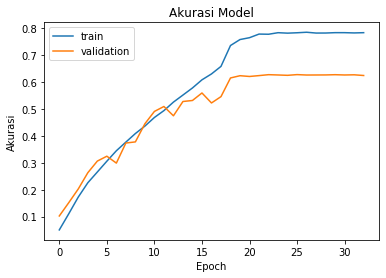

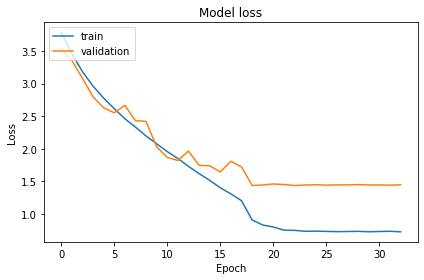

In [26]:
# summarize history for accuracy
log_data = pd.read_csv('model-alexnet-14july/training.log')
plt.plot(log_data['acc'])
plt.plot(log_data['val_acc'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()